#Carico il Dataset e le librerie

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import keras

tabella_tot = pd.read_csv('/content/drive/MyDrive/Tesina - DM/Paralleli/tabella_tot.csv')
tabella_tot.head()
tabella_tot.columns


Index(['machineID', 'error1', 'error2', 'error3', 'error4', 'error5',
       'error_tot', 'fail_comp1', 'fail_comp2', 'fail_comp3', 'fail_comp4',
       'fail_tot', 'main_tot_comp1', 'main_tot_comp2', 'main_tot_comp3',
       'main_tot_comp4', 'main_tot', 'main_pre_comp1', 'main_pre_comp2',
       'main_pre_comp3', 'main_pre_comp4', 'main_pre_tot', 'age', 'model',
       'time_since_last_fail1', 'time_since_last_fail2',
       'time_since_last_fail3', 'time_since_last_fail4',
       'time_since_last_maint1', 'time_since_last_maint2',
       'time_since_last_maint3', 'time_since_last_maint4',
       'time_since_last_error1', 'time_since_last_error2',
       'time_since_last_error3', 'time_since_last_error4',
       'time_since_last_error5', 'efficiency_rotate', 'volt_consume',
       'general_inefficiency', 'pressure_fatique', 'vibration_instability'],
      dtype='object')

#Modelli - Comp1

In [ ]:
tabella_tot=pd.read_csv('/content/drive/MyDrive/Tesina - DM/Paralleli/tabella_tot.csv')
tabella_tot_1=tabella_tot

<ipython-input-3-1d9c395a1e87>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=target_corr.index, y=target_corr.values, palette="coolwarm")


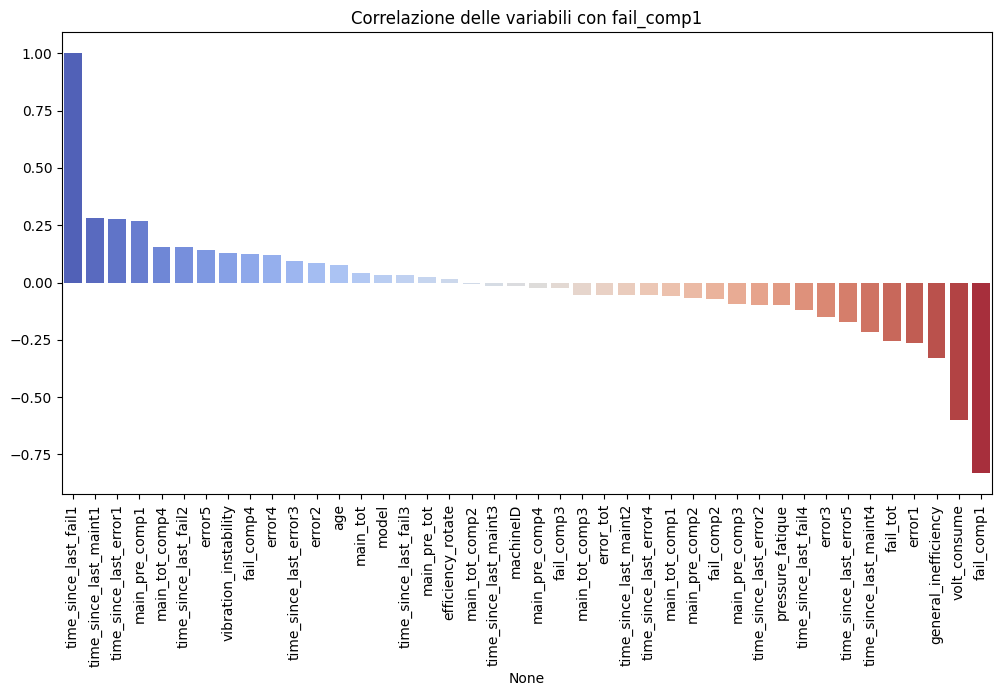

Index(['machineID', 'error1', 'error2', 'error3', 'error4', 'error5',
       'error_tot', 'fail_comp1', 'fail_comp2', 'fail_comp3', 'fail_comp4',
       'fail_tot', 'main_tot_comp1', 'main_tot_comp2', 'main_tot_comp3',
       'main_tot_comp4', 'main_tot', 'main_pre_comp1', 'main_pre_comp2',
       'main_pre_comp3', 'main_pre_comp4', 'main_pre_tot', 'age', 'model',
       'time_since_last_fail1', 'time_since_last_fail2',
       'time_since_last_fail3', 'time_since_last_fail4',
       'time_since_last_maint1', 'time_since_last_maint2',
       'time_since_last_maint3', 'time_since_last_maint4',
       'time_since_last_error1', 'time_since_last_error2',
       'time_since_last_error3', 'time_since_last_error4',
       'time_since_last_error5', 'efficiency_rotate', 'volt_consume',
       'general_inefficiency', 'pressure_fatique', 'vibration_instability'],
      dtype='object')


In [ ]:
# Correlazione con la variabile target
target_corr = tabella_tot_1.corr()["time_since_last_fail1"].sort_values(ascending=False)

# Grafico a barre
plt.figure(figsize=(12, 6))
sns.barplot(x=target_corr.index, y=target_corr.values, palette="coolwarm")
plt.xticks(rotation=90)
plt.title("Correlazione delle variabili con fail_comp1")
plt.show()
print(tabella_tot.columns)

In [ ]:
tabella_tot_1["fail1_inefficiency"] = (tabella_tot_1["fail_comp1"]/tabella_tot_1["fail_tot"])/tabella_tot_1["general_inefficiency"]
tabella_tot_1["volt_inefficiency"] = tabella_tot_1["volt_consume"]/tabella_tot_1["general_inefficiency"]
tabella_tot_1["error1_fail1"] = tabella_tot_1["error1"]/tabella_tot_1["fail_comp1"]
tabella_tot_1["fail1_maint1"] = tabella_tot_1["time_since_last_fail1"]/tabella_tot_1["time_since_last_maint1"]
tabella_tot_1["fail1_year"] = tabella_tot_1["time_since_last_fail1"]/ 8761
tabella_tot_1["maint1_year"] = tabella_tot_1["time_since_last_maint1"]/ 24
tabella_tot_1["main_pre_fail"] = tabella_tot_1["main_pre_comp1"]/tabella_tot_1["fail_comp1"] + 0.000001
tabella_tot_1["error1_fail1"] = tabella_tot_1["error1"]/tabella_tot_1["fail_comp1"]

tabella_tot_1["work_fail_risck"] = ((tabella_tot_1["time_since_last_fail1"] < (tabella_tot_1["time_since_last_fail1"].mean())) \
                                    & (tabella_tot_1["time_since_last_maint1"] > tabella_tot_1["time_since_last_maint1"].mean())).astype(int)
tabella_tot_1["high_vibration"] = (tabella_tot_1["vibration_instability"] > tabella_tot_1["vibration_instability"].median()).astype(int)
tabella_tot_1["no_fail1"] = tabella_tot_1["time_since_last_fail1"] == 8761
tabella_tot_1["volt_time_fail1"] = tabella_tot_1["volt_consume"]*tabella_tot_1["time_since_last_fail1"]
tabella_tot_1["inefficency_time_fail1"] = tabella_tot_1["general_inefficiency"]*tabella_tot_1["time_since_last_fail1"]

tabella_tot_1.replace([np.inf, -np.inf], 0, inplace=True)
tabella_tot_1.fillna(0, inplace=True)
tabella_tot_1.head()


,machineID,error1,error2,error3,error4,error5,error_tot,fail_comp1,fail_comp2,fail_comp3,...,error1_fail1,fail1_maint1,fail1_year,maint1_year,main_pre_fail,work_fail_risck,high_vibration,no_fail1,volt_time_fail1,inefficency_time_fail1
0,1,11,6,9,5,4,35,1,2,0,...,11.0,3.345994,0.824563,89.958333,9.000001,0,1,False,4837.257988,4353.480693
1,2,5,10,5,5,3,28,1,3,0,...,5.0,2.400834,0.788951,119.958333,5.000001,0,0,False,4626.350846,4158.962450
2,3,11,10,8,8,2,39,1,4,0,...,11.0,2.193943,0.901267,149.958333,7.000001,0,1,False,5281.829736,4753.869496
3,4,10,11,8,2,0,31,2,4,0,...,5.0,1.857483,0.534071,104.958333,2.500001,0,0,False,3129.907892,2815.085067
4,5,14,8,7,6,3,38,4,3,0,...,3.5,1.000000,0.410798,149.958333,0.750001,1,0,False,2412.894082,2170.900257


In [ ]:
X = tabella_tot_1.drop('time_since_last_fail1',axis='columns')
y = tabella_tot_1['time_since_last_fail1']

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)


*** Random Forest ***
MAE = 4.127329367642315
MAPE = 0.017739951141989747


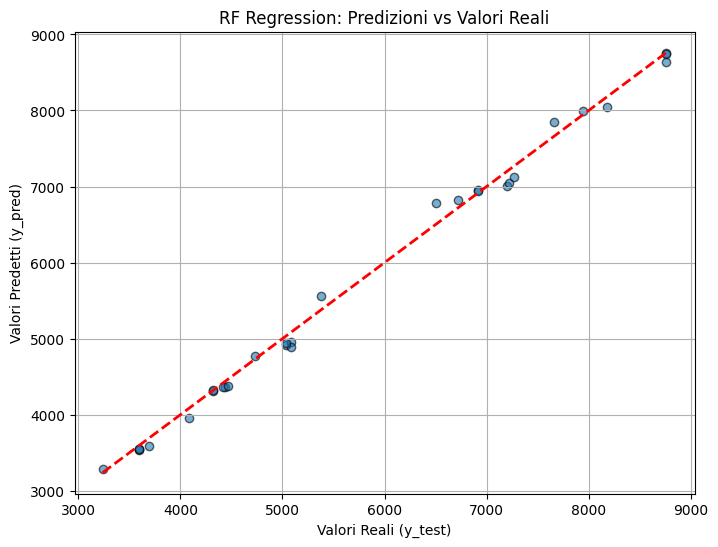

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error
import matplotlib.pyplot as plt
import seaborn as sns

print("*** Random Forest ***")
clf = RandomForestRegressor(n_estimators=600, max_depth=10,\
                            min_samples_split=5,\
                            random_state=42,\
                            n_jobs=-1)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print('MAE =', (mean_absolute_error(y_test, y_pred))/24)
print('MAPE =',mean_absolute_percentage_error(y_test, y_pred))
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6, edgecolors="k")
plt.xlabel("Valori Reali (y_test)")
plt.ylabel("Valori Predetti (y_pred)")
plt.title("RF Regression: Predizioni vs Valori Reali")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], "--r", linewidth=2)  # Linea diagonale ideale
plt.grid(True)
plt.show()


*** XGBoost Regression ***
MAE = 3.3258463541666665
MAPE = 0.01311621256172657


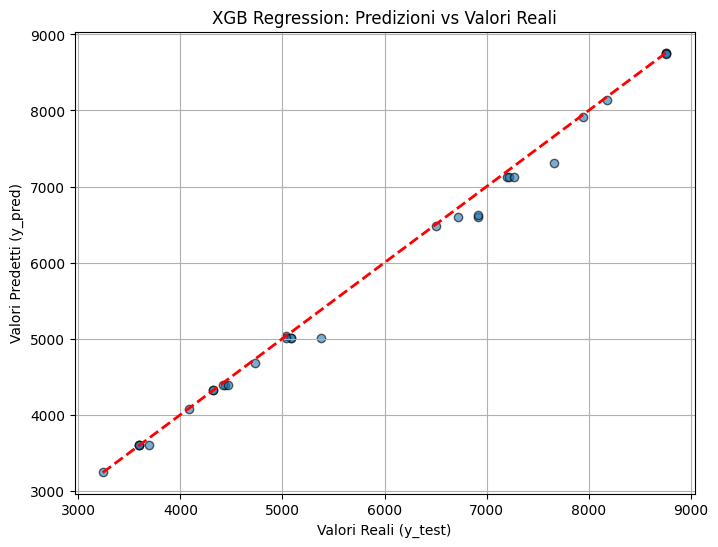

In [ ]:
import xgboost as xgb
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error
import matplotlib.pyplot as plt

print("*** XGBoost Regression ***")
clf = xgb.XGBRegressor(objective="reg:squarederror",\
                       n_estimators=500,
                       learning_rate=0.1,
                       random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print('MAE =', (mean_absolute_error(y_test, y_pred))/24)
print('MAPE =', mean_absolute_percentage_error(y_test, y_pred))
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6, edgecolors="k")
plt.xlabel("Valori Reali (y_test)")
plt.ylabel("Valori Predetti (y_pred)")
plt.title("XGB Regression: Predizioni vs Valori Reali")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], "--r", linewidth=2)  # Linea diagonale ideale
plt.grid(True)
plt.show()


*** Linear Regression ***
MAE = 5.7600421617583684e-09
MAPE = 6.578168753208765e-13


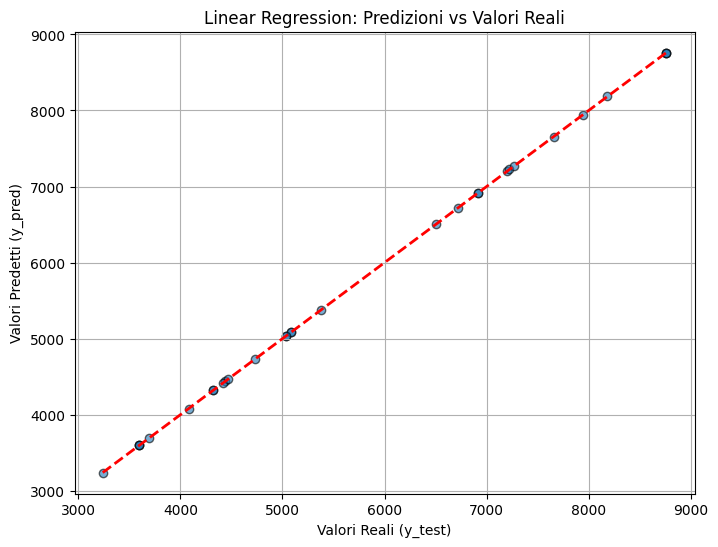

In [ ]:
import matplotlib.pyplot as plt
print("*** Linear Regression ***")


clf = LinearRegression()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print('MAE =', mean_absolute_error(y_test, y_pred))
print('MAPE =',mean_absolute_percentage_error(y_test, y_pred))
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6, edgecolors="k")
plt.xlabel("Valori Reali (y_test)")
plt.ylabel("Valori Predetti (y_pred)")
plt.title("Linear Regression: Predizioni vs Valori Reali")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], "--r", linewidth=2)  # Linea diagonale ideale
plt.grid(True)
plt.show()

Numero ottimale di vicini: 5
MAE: 35.9628
MAPE: 16.1498%


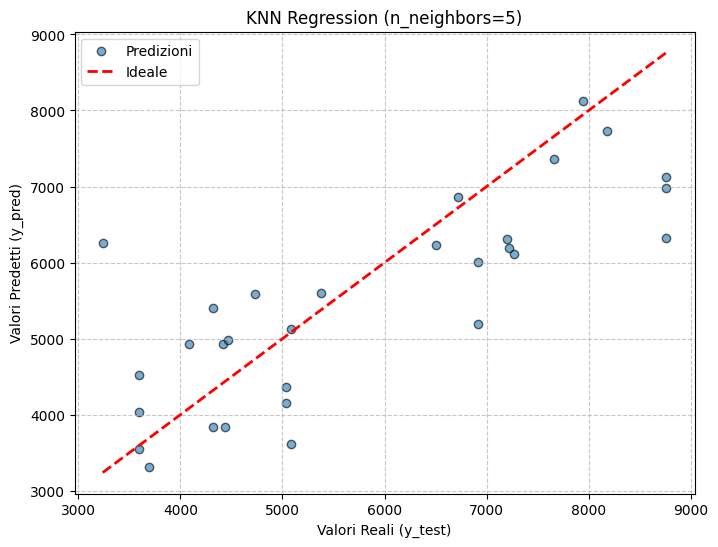

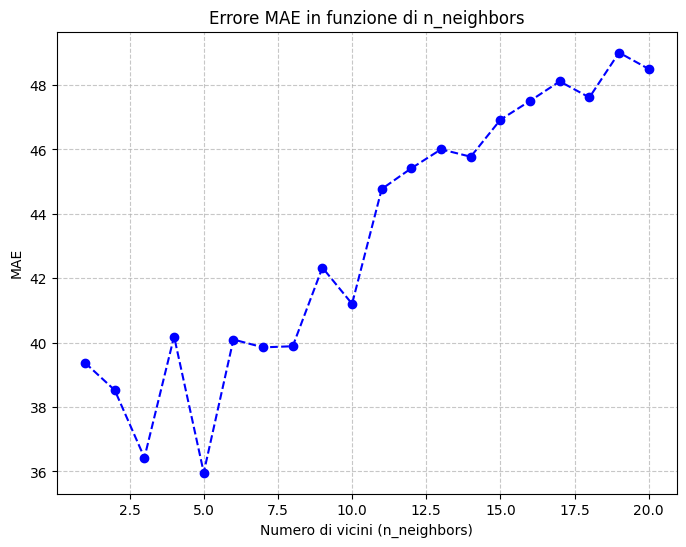

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error

# Definizione del range di n_neighbors da testare
n_neighbors_range = range(1, 21)
errors = []

for n_neighbors in n_neighbors_range:
    knn = KNeighborsRegressor(n_neighbors=n_neighbors)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred) / 24
    errors.append(mae)

# Trova il miglior numero di vicini
best_n = n_neighbors_range[np.argmin(errors)]
print(f"Numero ottimale di vicini: {best_n}")

# Addestramento del modello con il miglior n_neighbors
knn = KNeighborsRegressor(n_neighbors=best_n)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

# Calcolo metriche di errore
mae = mean_absolute_error(y_test, y_pred) / 24
mape = mean_absolute_percentage_error(y_test, y_pred)

# Stampa risultati in formato chiaro
print(f"MAE: {mae:.4f}")
print(f"MAPE: {mape:.4%}")

# Visualizzazione dei risultati
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6, edgecolors="k", label="Predizioni")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], "--r", linewidth=2, label="Ideale")  # Linea diagonale ideale
plt.xlabel("Valori Reali (y_test)")
plt.ylabel("Valori Predetti (y_pred)")
plt.title(f"KNN Regression (n_neighbors={best_n})")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.7)
plt.show()

# Visualizzazione dell'errore in funzione di n_neighbors
plt.figure(figsize=(8, 6))
plt.plot(n_neighbors_range, errors, marker='o', linestyle='dashed', color='b')
plt.xlabel("Numero di vicini (n_neighbors)")
plt.ylabel("MAE")
plt.title("Errore MAE in funzione di n_neighbors")
plt.grid(True, linestyle="--", alpha=0.7)
plt.show()


#Modelli - Comp2

In [ ]:
tabella_tot = pd.read_csv('/content/drive/MyDrive/Tesina - DM/Paralleli/tabella_tot.csv')
tabella_tot_2 = tabella_tot
tabella_tot_2.head()

,machineID,error1,error2,error3,error4,error5,error_tot,fail_comp1,fail_comp2,fail_comp3,...,time_since_last_error1,time_since_last_error2,time_since_last_error3,time_since_last_error4,time_since_last_error5,efficiency_rotate,volt_consume,general_inefficiency,pressure_fatique,vibration_instability
0,1,11,6,9,5,4,35,1,2,0,...,2173,3161,2529,5399,3959,0.642191,0.669609,0.602641,0.541367,0.528529
1,2,5,10,5,5,3,28,1,3,0,...,3620,2290,4934,3883,3590,0.642267,0.669322,0.601702,0.540677,0.524821
2,3,11,10,8,8,2,39,1,4,0,...,3408,2169,2444,2511,6548,0.642546,0.668925,0.602060,0.541285,0.527084
3,4,10,11,8,2,0,31,2,4,0,...,3471,1920,2519,4979,8761,0.641785,0.668927,0.601642,0.540838,0.525343
4,5,14,8,7,6,3,38,4,3,0,...,1257,2221,2595,3146,3675,0.642943,0.670435,0.603195,0.543507,0.524343


<ipython-input-12-5163cfeeaec6>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=target_corr.index, y=target_corr.values, palette="coolwarm")


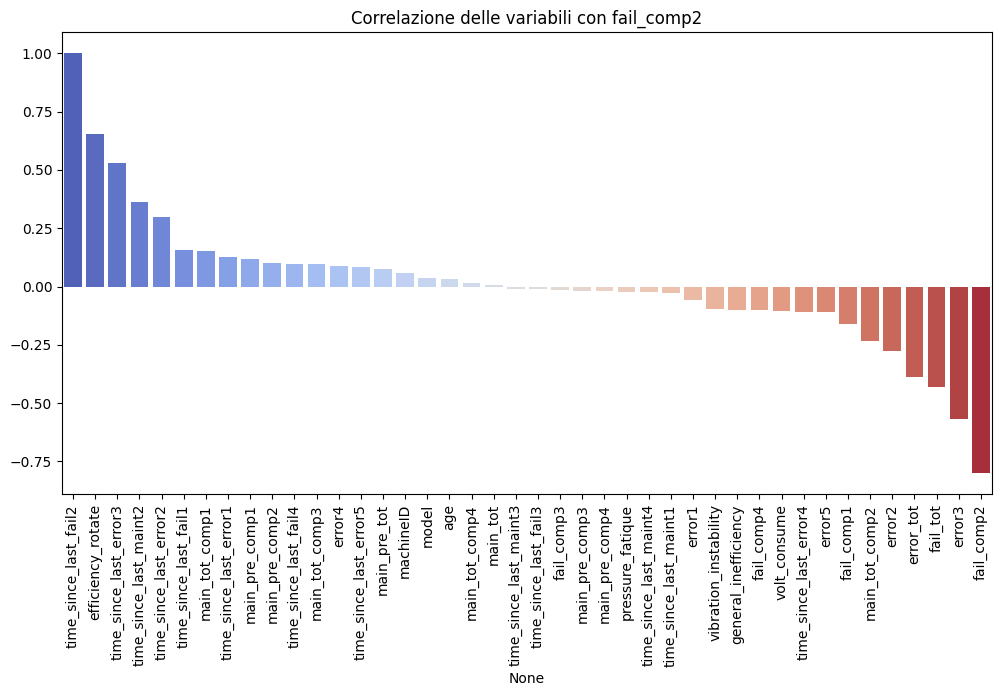

Index(['machineID', 'error1', 'error2', 'error3', 'error4', 'error5',
       'error_tot', 'fail_comp1', 'fail_comp2', 'fail_comp3', 'fail_comp4',
       'fail_tot', 'main_tot_comp1', 'main_tot_comp2', 'main_tot_comp3',
       'main_tot_comp4', 'main_tot', 'main_pre_comp1', 'main_pre_comp2',
       'main_pre_comp3', 'main_pre_comp4', 'main_pre_tot', 'age', 'model',
       'time_since_last_fail1', 'time_since_last_fail2',
       'time_since_last_fail3', 'time_since_last_fail4',
       'time_since_last_maint1', 'time_since_last_maint2',
       'time_since_last_maint3', 'time_since_last_maint4',
       'time_since_last_error1', 'time_since_last_error2',
       'time_since_last_error3', 'time_since_last_error4',
       'time_since_last_error5', 'efficiency_rotate', 'volt_consume',
       'general_inefficiency', 'pressure_fatique', 'vibration_instability'],
      dtype='object')


In [ ]:
# Correlazione con la variabile target
target_corr = tabella_tot_2.corr()["time_since_last_fail2"].sort_values(ascending=False)

# Grafico a barre
plt.figure(figsize=(12, 6))
sns.barplot(x=target_corr.index, y=target_corr.values, palette="coolwarm")
plt.xticks(rotation=90)
plt.title("Correlazione delle variabili con fail_comp2")
plt.show()
print(tabella_tot.columns)

In [ ]:
tabella_tot_2["fail1_inefficiency"] = (tabella_tot_2["fail_comp2"]/tabella_tot_2["fail_tot"])/tabella_tot_2["general_inefficiency"]
tabella_tot_2["volt_inefficiency"] = tabella_tot_2["volt_consume"]/tabella_tot_2["general_inefficiency"]
tabella_tot_2["error3_fail2"] = tabella_tot_2["error3"]/tabella_tot_2["fail_comp2"]
tabella_tot_2["fail2_maint2"] = tabella_tot_2["time_since_last_fail2"]/tabella_tot_2["time_since_last_maint2"]
tabella_tot_2["fail2_year"] = tabella_tot_2["time_since_last_fail2"]/ 8761
tabella_tot_2["maint2_year"] = tabella_tot_2["time_since_last_maint2"]/ 24
tabella_tot_2["main_pre_fail"] = tabella_tot_2["main_pre_comp2"]/tabella_tot_2["fail_comp2"] + 0.000001

tabella_tot_2["work_fail_risck"] = ((tabella_tot_2["time_since_last_fail2"] < (tabella_tot_2["time_since_last_fail2"].mean())) \
                                    & (tabella_tot_2["time_since_last_maint2"] > tabella_tot_2["time_since_last_maint2"].mean())).astype(int)
tabella_tot_2["high_vibration"] = (tabella_tot_2["vibration_instability"] > tabella_tot_2["vibration_instability"].median()).astype(int)
tabella_tot_2["no_fail2"] = tabella_tot_2["time_since_last_fail2"] == 8761
tabella_tot_2["efficency_time_fail2"] = tabella_tot_2["general_inefficiency"]*tabella_tot_2["time_since_last_fail2"]

tabella_tot_2.replace([np.inf, -np.inf], 0, inplace=True)
tabella_tot_2.fillna(0, inplace=True)
tabella_tot_2.head()


,machineID,error1,error2,error3,error4,error5,error_tot,fail_comp1,fail_comp2,fail_comp3,...,volt_inefficiency,error3_fail2,fail2_maint2,fail2_year,maint2_year,main_pre_fail,work_fail_risck,high_vibration,no_fail2,efficency_time_fail2
0,1,11,6,9,5,4,35,1,2,0,...,1.111124,4.500000,1.650994,0.492980,109.000000,3.000001,0,1,False,2602.807740
1,2,5,10,5,5,3,28,1,3,0,...,1.112381,1.666667,2.125391,0.698436,119.958333,1.666668,0,0,False,3681.812968
2,3,11,10,8,8,2,39,1,4,0,...,1.111059,2.000000,3.251564,0.534071,59.958333,1.750001,0,1,False,2817.040954
3,4,10,11,8,2,0,31,2,4,0,...,1.111834,2.000000,1.000000,0.287524,104.958333,0.500001,0,0,False,1515.537355
4,5,14,8,7,6,3,38,4,3,0,...,1.111472,2.333333,1.833719,0.451889,89.958333,2.333334,0,0,False,2388.050603


In [ ]:
X = tabella_tot_2.drop('time_since_last_fail2',axis='columns')
y = tabella_tot_2['time_since_last_fail2']

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)


*** Random Forest ***
MAE = 3.265147629389648
MAPE = 0.015851479032560376


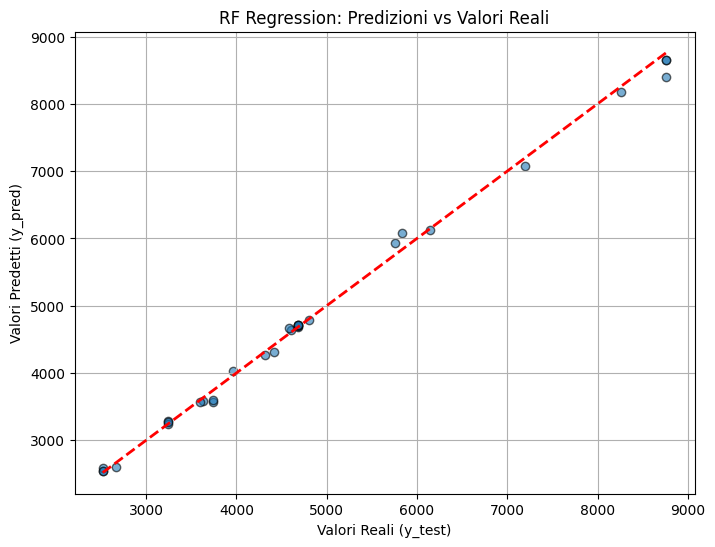

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error
import matplotlib.pyplot as plt
import seaborn as sns

print("*** Random Forest ***")
clf = RandomForestRegressor(n_estimators=600, max_depth=10,\
                            min_samples_split=5,\
                            random_state=42,\
                            n_jobs=-1)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print('MAE =', (mean_absolute_error(y_test, y_pred))/24)
print('MAPE =',mean_absolute_percentage_error(y_test, y_pred))
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6, edgecolors="k")
plt.xlabel("Valori Reali (y_test)")
plt.ylabel("Valori Predetti (y_pred)")
plt.title("RF Regression: Predizioni vs Valori Reali")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], "--r", linewidth=2)  # Linea diagonale ideale
plt.grid(True)
plt.show()


*** XGBoost Regression ***
MAE = 2.7516069412231445
MAPE = 0.012232393957674503


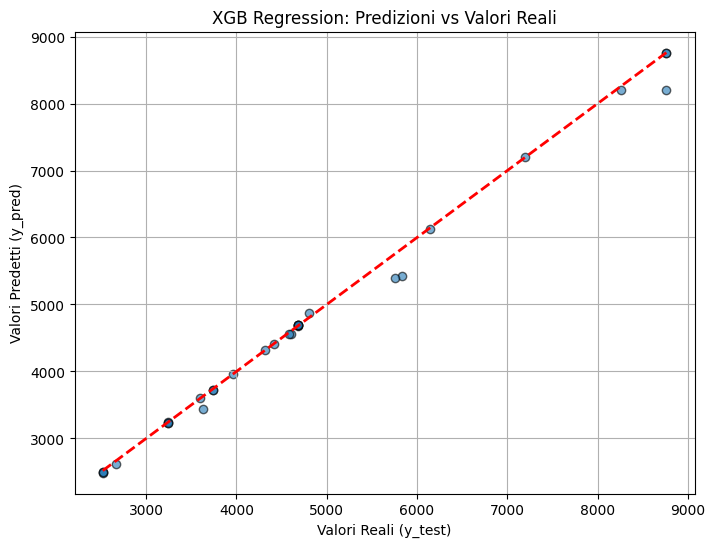

In [ ]:
import xgboost as xgb
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error
import matplotlib.pyplot as plt

print("*** XGBoost Regression ***")
clf = xgb.XGBRegressor(objective="reg:squarederror",\
                       n_estimators=500,
                       learning_rate=0.1,
                       random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print('MAE =', (mean_absolute_error(y_test, y_pred))/24)
print('MAPE =', mean_absolute_percentage_error(y_test, y_pred))
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6, edgecolors="k")
plt.xlabel("Valori Reali (y_test)")
plt.ylabel("Valori Predetti (y_pred)")
plt.title("XGB Regression: Predizioni vs Valori Reali")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], "--r", linewidth=2)  # Linea diagonale ideale
plt.grid(True)
plt.show()


*** Linear Regression ***
MAE = 7.977710083650891e-08
MAPE = 9.107288771498245e-12


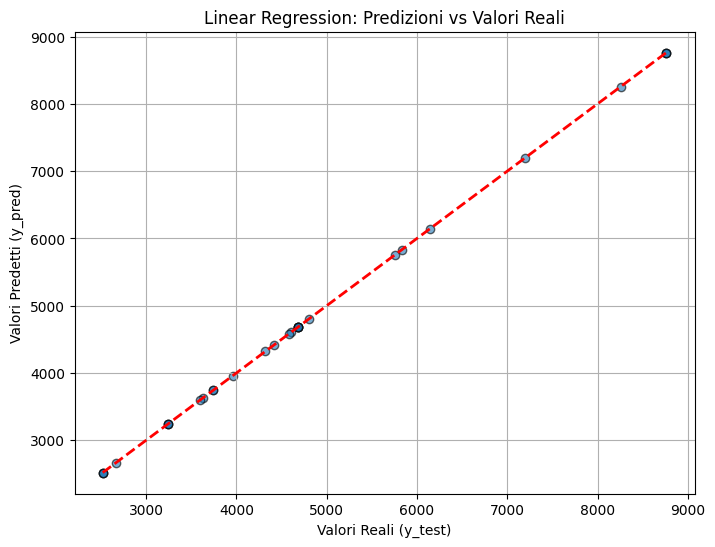

In [ ]:
import matplotlib.pyplot as plt
print("*** Linear Regression ***")


clf = LinearRegression()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print('MAE =', mean_absolute_error(y_test, y_pred))
print('MAPE =',mean_absolute_percentage_error(y_test, y_pred))
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6, edgecolors="k")
plt.xlabel("Valori Reali (y_test)")
plt.ylabel("Valori Predetti (y_pred)")
plt.title("Linear Regression: Predizioni vs Valori Reali")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], "--r", linewidth=2)  # Linea diagonale ideale
plt.grid(True)
plt.show()

Numero ottimale di vicini: 4
MAE: 37.9868
MAPE: 19.8840%


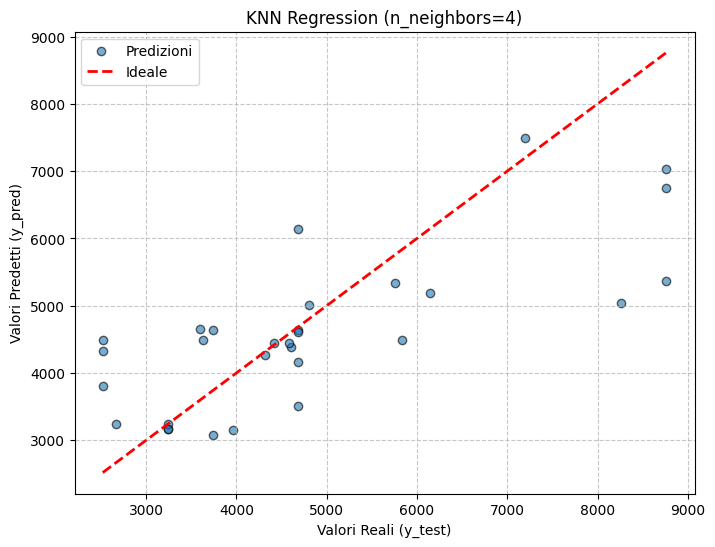

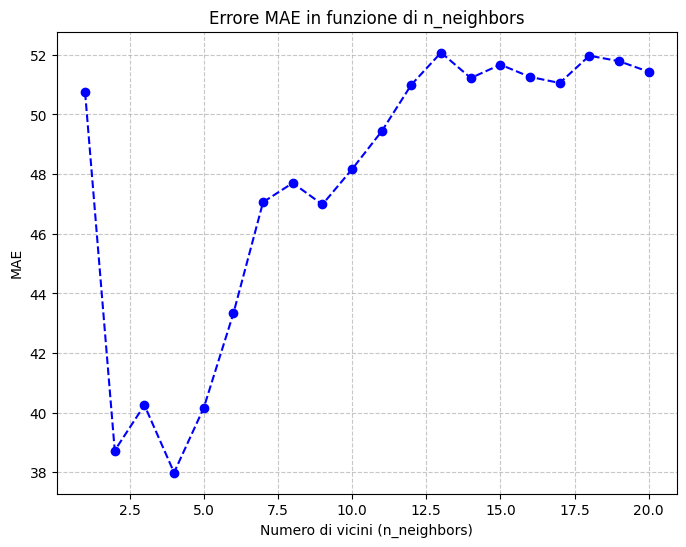

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error

# Definizione del range di n_neighbors da testare
n_neighbors_range = range(1, 21)
errors = []

for n_neighbors in n_neighbors_range:
    knn = KNeighborsRegressor(n_neighbors=n_neighbors)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred) / 24
    errors.append(mae)

# Trova il miglior numero di vicini
best_n = n_neighbors_range[np.argmin(errors)]
print(f"Numero ottimale di vicini: {best_n}")

# Addestramento del modello con il miglior n_neighbors
knn = KNeighborsRegressor(n_neighbors=best_n)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

# Calcolo metriche di errore
mae = mean_absolute_error(y_test, y_pred) / 24
mape = mean_absolute_percentage_error(y_test, y_pred)

# Stampa risultati in formato chiaro
print(f"MAE: {mae:.4f}")
print(f"MAPE: {mape:.4%}")

# Visualizzazione dei risultati
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6, edgecolors="k", label="Predizioni")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], "--r", linewidth=2, label="Ideale")  # Linea diagonale ideale
plt.xlabel("Valori Reali (y_test)")
plt.ylabel("Valori Predetti (y_pred)")
plt.title(f"KNN Regression (n_neighbors={best_n})")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.7)
plt.show()

# Visualizzazione dell'errore in funzione di n_neighbors
plt.figure(figsize=(8, 6))
plt.plot(n_neighbors_range, errors, marker='o', linestyle='dashed', color='b')
plt.xlabel("Numero di vicini (n_neighbors)")
plt.ylabel("MAE")
plt.title("Errore MAE in funzione di n_neighbors")
plt.grid(True, linestyle="--", alpha=0.7)
plt.show()


#Modelli - Comp3

In [ ]:
tabella_tot = pd.read_csv('/content/drive/MyDrive/Tesina - DM/Paralleli/tabella_tot.csv')
tabella_tot_3 = tabella_tot

<ipython-input-21-d0d86c0419bf>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=target_corr.index, y=target_corr.values, palette="coolwarm")


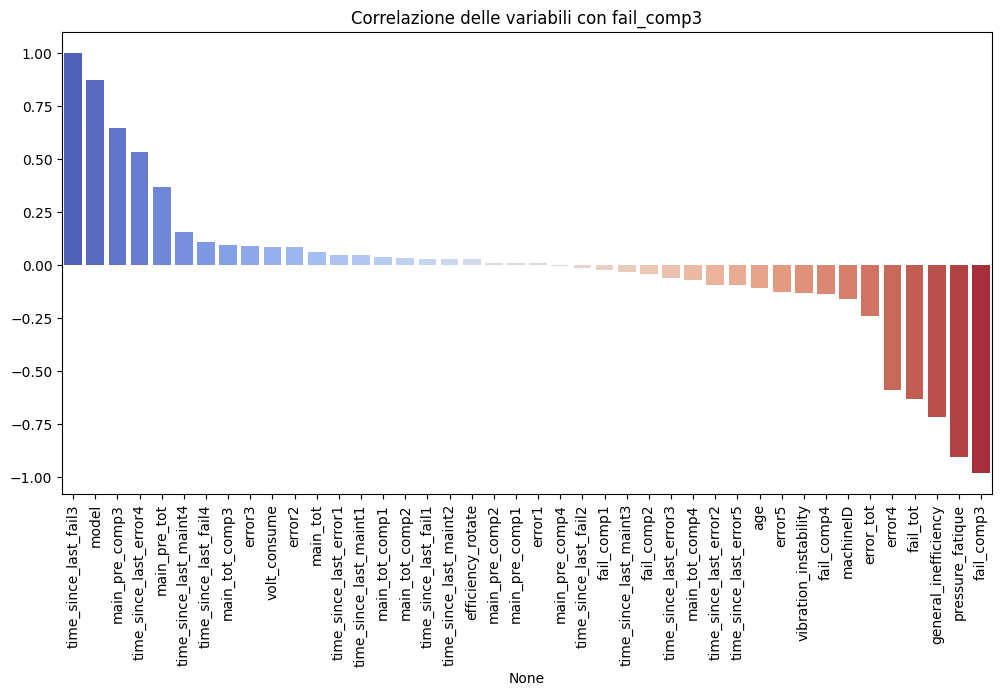

Index(['machineID', 'error1', 'error2', 'error3', 'error4', 'error5',
       'error_tot', 'fail_comp1', 'fail_comp2', 'fail_comp3', 'fail_comp4',
       'fail_tot', 'main_tot_comp1', 'main_tot_comp2', 'main_tot_comp3',
       'main_tot_comp4', 'main_tot', 'main_pre_comp1', 'main_pre_comp2',
       'main_pre_comp3', 'main_pre_comp4', 'main_pre_tot', 'age', 'model',
       'time_since_last_fail1', 'time_since_last_fail2',
       'time_since_last_fail3', 'time_since_last_fail4',
       'time_since_last_maint1', 'time_since_last_maint2',
       'time_since_last_maint3', 'time_since_last_maint4',
       'time_since_last_error1', 'time_since_last_error2',
       'time_since_last_error3', 'time_since_last_error4',
       'time_since_last_error5', 'efficiency_rotate', 'volt_consume',
       'general_inefficiency', 'pressure_fatique', 'vibration_instability'],
      dtype='object')


In [ ]:
# Correlazione con la variabile target
target_corr = tabella_tot_3.corr()["time_since_last_fail3"].sort_values(ascending=False)

# Grafico a barre
plt.figure(figsize=(12, 6))
sns.barplot(x=target_corr.index, y=target_corr.values, palette="coolwarm")
plt.xticks(rotation=90)
plt.title("Correlazione delle variabili con fail_comp3")
plt.show()
print(tabella_tot.columns)

In [ ]:
tabella_tot_3["fail1_inefficiency"] = (tabella_tot_3["fail_comp3"]/tabella_tot_3["fail_tot"])/tabella_tot_3["general_inefficiency"]
tabella_tot_3["volt_inefficiency"] = tabella_tot_3["volt_consume"]/tabella_tot_3["general_inefficiency"]
tabella_tot_3["error4_fail3"] = tabella_tot_3["error4"]/tabella_tot_2["fail_comp3"]
tabella_tot_3["fail3_maint3"] = tabella_tot_3["time_since_last_fail3"]/tabella_tot_3["time_since_last_maint3"]
tabella_tot_3["fail3_year"] = tabella_tot_3["time_since_last_fail3"]/ 8761
tabella_tot_3["maint3_year"] = tabella_tot_3["time_since_last_maint3"]/ 24
tabella_tot_3["main_pre_fail"] = tabella_tot_3["main_pre_comp3"]/tabella_tot_3["fail_comp3"] + 0.000001
tabella_tot_3["error4_fail3"] = tabella_tot_3["error4"]/tabella_tot_3["fail_comp3"]

tabella_tot_3["work_fail_risck"] = ((tabella_tot_3["time_since_last_fail3"] < (tabella_tot_3["time_since_last_fail3"].mean())) \
                                    & (tabella_tot_3["time_since_last_maint3"] > tabella_tot_3["time_since_last_maint3"].mean())).astype(int)
tabella_tot_3["high_vibration"] = (tabella_tot_3["vibration_instability"] > tabella_tot_3["vibration_instability"].median()).astype(int)
tabella_tot_3["no_fail2"] = tabella_tot_2["time_since_last_fail3"] == 8761
tabella_tot_3["efficency_time_fail3"] = tabella_tot_3["general_inefficiency"]*tabella_tot_3["time_since_last_fail3"]
tabella_tot_3["inefficiency_fail3"] = tabella_tot_3["general_inefficiency"]*tabella_tot_3["fail_comp3"]
tabella_tot_3["model_fail3"] = tabella_tot_3["model"]/tabella_tot_3["fail_comp3"]
tabella_tot_3["high_volt"] = (tabella_tot_1["volt_consume"] > tabella_tot_1["volt_consume"].median()).astype(int)
tabella_tot_3["pressure_fail3"] = tabella_tot_3["pressure_fatique"]/tabella_tot_3["time_since_last_fail3"]
tabella_tot_3.replace([np.inf, -np.inf], 0, inplace=True)
tabella_tot_3.fillna(0, inplace=True)
tabella_tot_3.head()


,machineID,error1,error2,error3,error4,error5,error_tot,fail_comp1,fail_comp2,fail_comp3,...,maint3_year,main_pre_fail,work_fail_risck,high_vibration,no_fail2,efficency_time_fail3,inefficiency_fail3,model_fail3,high_volt,pressure_fail3
0,1,11,6,9,5,4,35,1,2,0,...,179.958333,0.0,0,1,True,5279.740359,0.0,0.0,1,0.000062
1,2,5,10,5,5,3,28,1,3,0,...,179.958333,0.0,0,0,True,5271.508974,0.0,0.0,0,0.000062
2,3,11,10,8,8,2,39,1,4,0,...,104.000000,0.0,0,1,True,5274.651806,0.0,0.0,0,0.000062
3,4,10,11,8,2,0,31,2,4,0,...,119.958333,0.0,0,0,True,5270.989587,0.0,0.0,0,0.000062
4,5,14,8,7,6,3,38,4,3,0,...,74.958333,0.0,0,0,True,5284.594931,0.0,0.0,1,0.000062


In [ ]:
X = tabella_tot_3.drop('time_since_last_fail3',axis='columns')
y = tabella_tot_3['time_since_last_fail3']

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)


*** Random Forest ***
MAE = 3.4010929273722623
MAPE = 0.01724186409749492


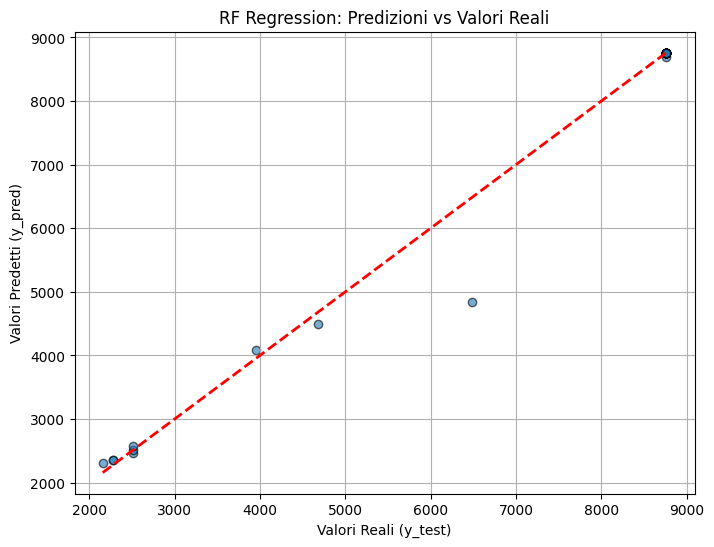

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error
import matplotlib.pyplot as plt
import seaborn as sns

print("*** Random Forest ***")
clf = RandomForestRegressor(n_estimators=600, max_depth=10,\
                            min_samples_split=5,\
                            random_state=42,\
                            n_jobs=-1)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print('MAE =', (mean_absolute_error(y_test, y_pred))/24)
print('MAPE =',mean_absolute_percentage_error(y_test, y_pred))
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6, edgecolors="k")
plt.xlabel("Valori Reali (y_test)")
plt.ylabel("Valori Predetti (y_pred)")
plt.title("RF Regression: Predizioni vs Valori Reali")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], "--r", linewidth=2)  # Linea diagonale ideale
plt.grid(True)
plt.show()


*** XGBoost Regression ***
MAE = 4.389464060465495
MAPE = 0.021713947877287865


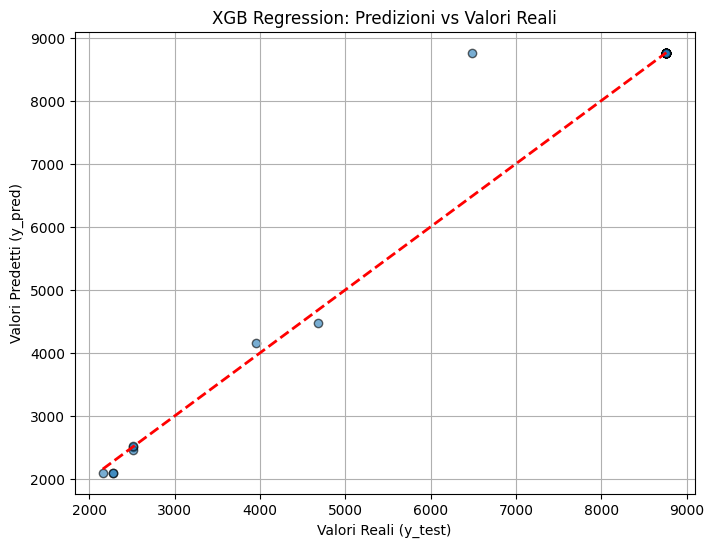

In [ ]:
import xgboost as xgb
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error
import matplotlib.pyplot as plt

print("*** XGBoost Regression ***")
clf = xgb.XGBRegressor(objective="reg:squarederror",\
                       n_estimators=500,
                       learning_rate=0.1,
                       random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print('MAE =', (mean_absolute_error(y_test, y_pred))/24)
print('MAPE =', mean_absolute_percentage_error(y_test, y_pred))
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6, edgecolors="k")
plt.xlabel("Valori Reali (y_test)")
plt.ylabel("Valori Predetti (y_pred)")
plt.title("XGB Regression: Predizioni vs Valori Reali")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], "--r", linewidth=2)  # Linea diagonale ideale
plt.grid(True)
plt.show()


*** Linear Regression ***
MAE = 1.831991994549753e-07
MAPE = 2.0911547030986632e-11


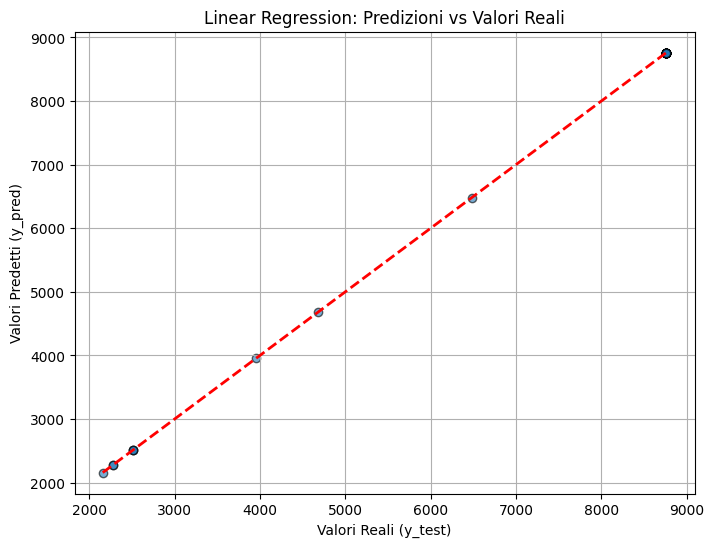

In [ ]:
import matplotlib.pyplot as plt
print("*** Linear Regression ***")

clf = LinearRegression()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print('MAE =', mean_absolute_error(y_test, y_pred))
print('MAPE =',mean_absolute_percentage_error(y_test, y_pred))
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6, edgecolors="k")
plt.xlabel("Valori Reali (y_test)")
plt.ylabel("Valori Predetti (y_pred)")
plt.title("Linear Regression: Predizioni vs Valori Reali")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], "--r", linewidth=2)  # Linea diagonale ideale
plt.grid(True)
plt.show()

Numero ottimale di vicini: 1
MAE: 11.9014
MAPE: 5.8230%


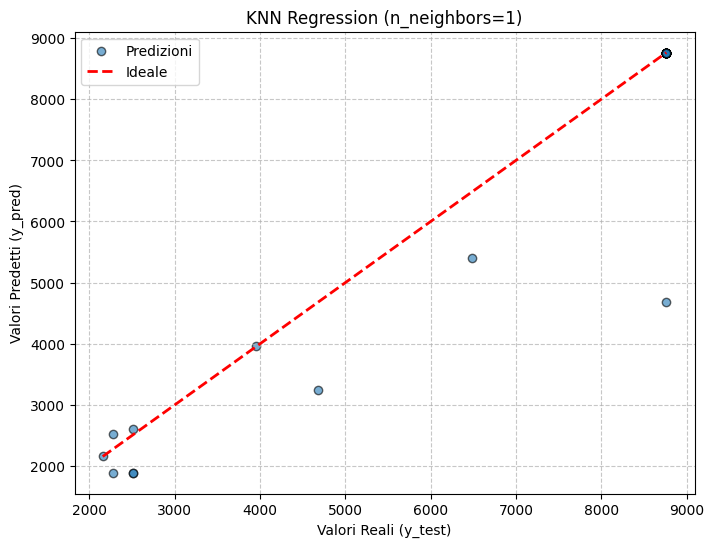

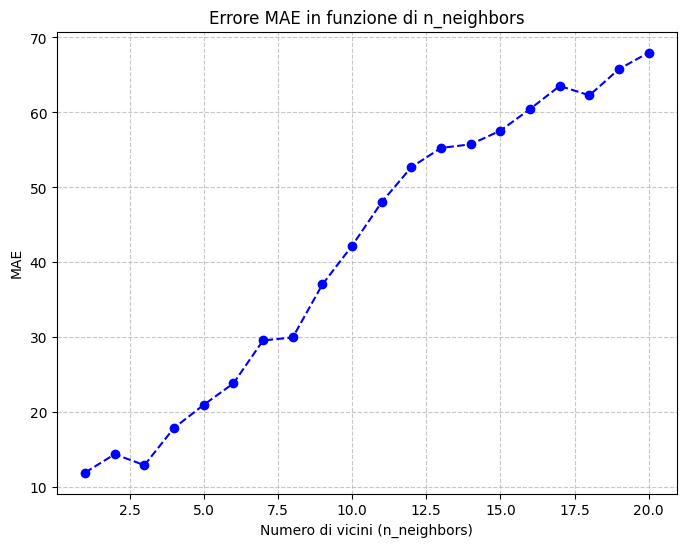

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error

# Definizione del range di n_neighbors da testare
n_neighbors_range = range(1, 21)
errors = []

for n_neighbors in n_neighbors_range:
    knn = KNeighborsRegressor(n_neighbors=n_neighbors)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred) / 24
    errors.append(mae)

# Trova il miglior numero di vicini
best_n = n_neighbors_range[np.argmin(errors)]
print(f"Numero ottimale di vicini: {best_n}")

# Addestramento del modello con il miglior n_neighbors
knn = KNeighborsRegressor(n_neighbors=best_n)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

# Calcolo metriche di errore
mae = mean_absolute_error(y_test, y_pred) / 24
mape = mean_absolute_percentage_error(y_test, y_pred)

# Stampa risultati in formato chiaro
print(f"MAE: {mae:.4f}")
print(f"MAPE: {mape:.4%}")

# Visualizzazione dei risultati
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6, edgecolors="k", label="Predizioni")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], "--r", linewidth=2, label="Ideale")  # Linea diagonale ideale
plt.xlabel("Valori Reali (y_test)")
plt.ylabel("Valori Predetti (y_pred)")
plt.title(f"KNN Regression (n_neighbors={best_n})")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.7)
plt.show()

# Visualizzazione dell'errore in funzione di n_neighbors
plt.figure(figsize=(8, 6))
plt.plot(n_neighbors_range, errors, marker='o', linestyle='dashed', color='b')
plt.xlabel("Numero di vicini (n_neighbors)")
plt.ylabel("MAE")
plt.title("Errore MAE in funzione di n_neighbors")
plt.grid(True, linestyle="--", alpha=0.7)
plt.show()


#Modelli - Comp4

In [ ]:
tabella_tot = pd.read_csv('/content/drive/MyDrive/Tesina - DM/Paralleli/tabella_tot.csv')
tabella_tot_4 = tabella_tot

<ipython-input-30-5440874adc27>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=target_corr.index, y=target_corr.values, palette="coolwarm")


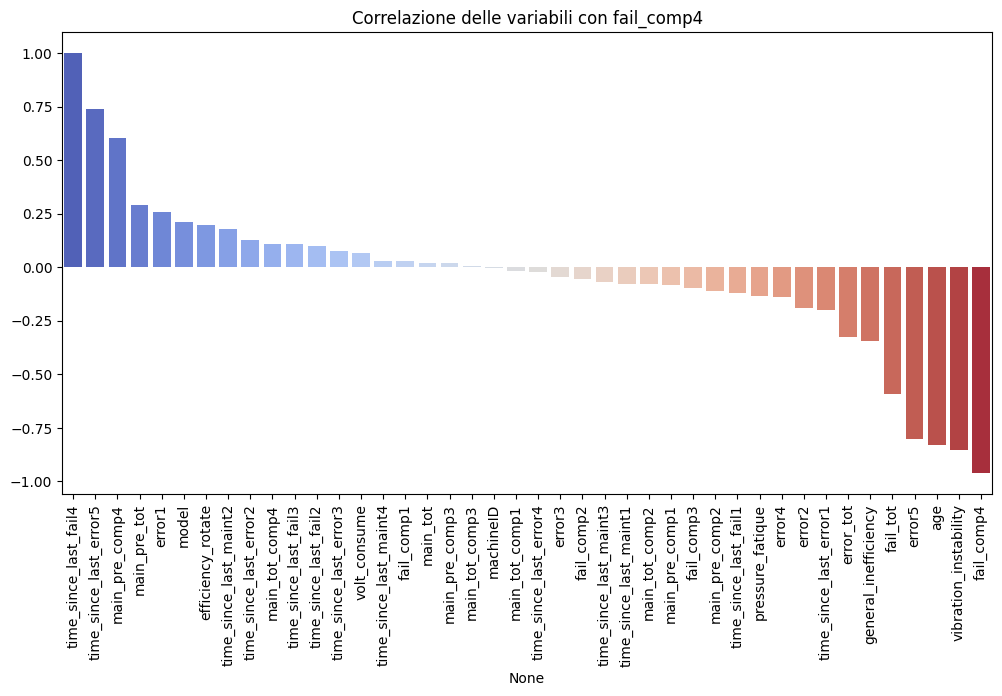

Index(['machineID', 'error1', 'error2', 'error3', 'error4', 'error5',
       'error_tot', 'fail_comp1', 'fail_comp2', 'fail_comp3', 'fail_comp4',
       'fail_tot', 'main_tot_comp1', 'main_tot_comp2', 'main_tot_comp3',
       'main_tot_comp4', 'main_tot', 'main_pre_comp1', 'main_pre_comp2',
       'main_pre_comp3', 'main_pre_comp4', 'main_pre_tot', 'age', 'model',
       'time_since_last_fail1', 'time_since_last_fail2',
       'time_since_last_fail3', 'time_since_last_fail4',
       'time_since_last_maint1', 'time_since_last_maint2',
       'time_since_last_maint3', 'time_since_last_maint4',
       'time_since_last_error1', 'time_since_last_error2',
       'time_since_last_error3', 'time_since_last_error4',
       'time_since_last_error5', 'efficiency_rotate', 'volt_consume',
       'general_inefficiency', 'pressure_fatique', 'vibration_instability'],
      dtype='object')


In [ ]:
# Correlazione con la variabile target
target_corr = tabella_tot_4.corr()["time_since_last_fail4"].sort_values(ascending=False)

# Grafico a barre
plt.figure(figsize=(12, 6))
sns.barplot(x=target_corr.index, y=target_corr.values, palette="coolwarm")
plt.xticks(rotation=90)
plt.title("Correlazione delle variabili con fail_comp4")
plt.show()
print(tabella_tot_4.columns)

In [ ]:
tabella_tot_4["fail4_inefficiency"] = (tabella_tot_4["fail_comp4"]/tabella_tot_4["fail_tot"])/tabella_tot_4["general_inefficiency"]
tabella_tot_4["volt_inefficiency"] = tabella_tot_4["volt_consume"]/tabella_tot_4["general_inefficiency"]
tabella_tot_4["error5_fail1"] = tabella_tot_4["error5"]/tabella_tot_4["fail_comp4"]
tabella_tot_4["fail4_maint4"] = tabella_tot_4["time_since_last_fail4"]/tabella_tot_4["time_since_last_maint4"]
tabella_tot_4["fail4_year"] = tabella_tot_4["time_since_last_fail4"]/ 8761
tabella_tot_4["maint4_year"] = tabella_tot_4["time_since_last_maint4"]/ 24
tabella_tot_4["main_pre_fail"] = tabella_tot_4["main_pre_comp1"]/tabella_tot_4["fail_comp4"] + 0.000001

tabella_tot_4["work_fail_risck"] = ((tabella_tot_4["time_since_last_fail4"] < (tabella_tot_4["time_since_last_fail4"].mean())) \
                                    & (tabella_tot_4["time_since_last_maint4"] > tabella_tot_4["time_since_last_maint4"].mean())).astype(int)
tabella_tot_4["high_vibration"] = (tabella_tot_4["vibration_instability"] > tabella_tot_4["vibration_instability"].median()).astype(int)
tabella_tot_4["no_fail2"] = tabella_tot_4["time_since_last_fail4"] == 8761

tabella_tot_4.replace([np.inf, -np.inf], 0, inplace=True)
tabella_tot_4.fillna(0, inplace=True)
tabella_tot_4.head()


,machineID,error1,error2,error3,error4,error5,error_tot,fail_comp1,fail_comp2,fail_comp3,...,fail1_inefficiency,volt_inefficiency,error5_fail1,fail1_maint1,fail1_year,maint1_year,main_pre_fail,work_fail_risck,high_vibration,no_fail2
0,1,11,6,9,5,4,35,1,2,0,...,0.948207,1.111124,1.0,1.222291,0.451889,134.958333,2.250001,1,1,False
1,2,5,10,5,5,3,28,1,3,0,...,0.000000,1.112381,0.0,4.869928,1.000000,74.958333,0.000000,0,0,True
2,3,11,10,8,8,2,39,1,4,0,...,0.000000,1.111059,0.0,3.477967,1.000000,104.958333,0.000000,0,1,True
3,4,10,11,8,2,0,31,2,4,0,...,0.000000,1.111834,0.0,4.011447,1.000000,91.000000,0.000000,0,0,True
4,5,14,8,7,6,3,38,4,3,0,...,0.000000,1.111472,0.0,2.704847,1.000000,134.958333,0.000000,0,0,True


In [ ]:
X = tabella_tot_4.drop('time_since_last_fail4',axis='columns')
y = tabella_tot_4['time_since_last_fail4']

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)


*** Random Forest ***
MAE = 3.237681245362135
MAPE = 0.024915363978734603


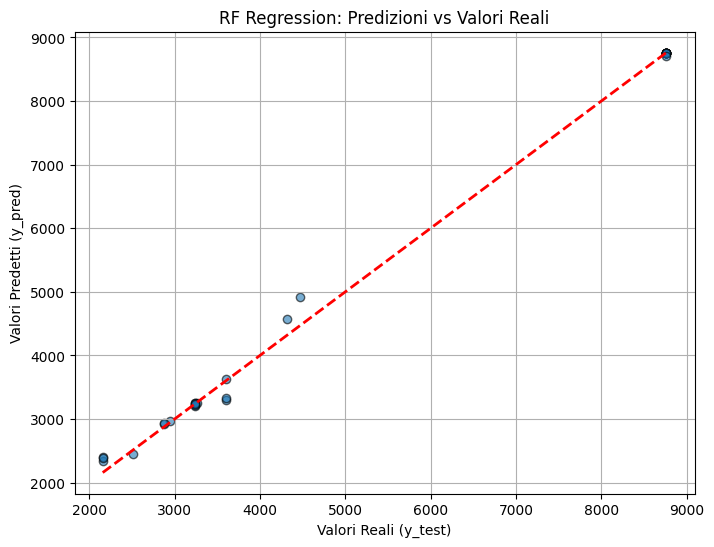

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error
import matplotlib.pyplot as plt
import seaborn as sns

print("*** Random Forest ***")
clf = RandomForestRegressor(n_estimators=600, max_depth=10,\
                            min_samples_split=5,\
                            random_state=42,\
                            n_jobs=-1)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print('MAE =', (mean_absolute_error(y_test, y_pred))/24)
print('MAPE =',mean_absolute_percentage_error(y_test, y_pred))
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6, edgecolors="k")
plt.xlabel("Valori Reali (y_test)")
plt.ylabel("Valori Predetti (y_pred)")
plt.title("RF Regression: Predizioni vs Valori Reali")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], "--r", linewidth=2)  # Linea diagonale ideale
plt.grid(True)
plt.show()


*** XGBoost Regression ***
MAE = 1.010156234105428
MAPE = 0.006925088819116354


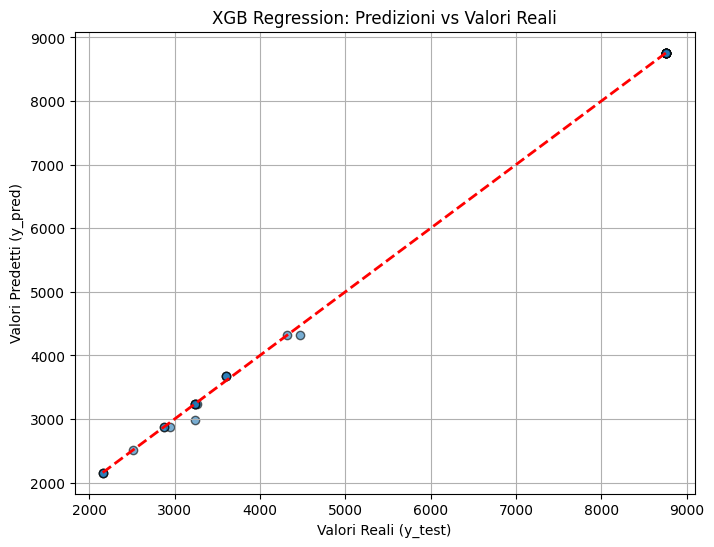

In [ ]:
import xgboost as xgb
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error
import matplotlib.pyplot as plt

print("*** XGBoost Regression ***")
clf = xgb.XGBRegressor(objective="reg:squarederror",\
                       n_estimators=500,
                       learning_rate=0.1,
                       random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print('MAE =', (mean_absolute_error(y_test, y_pred))/24)
print('MAPE =', mean_absolute_percentage_error(y_test, y_pred))
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6, edgecolors="k")
plt.xlabel("Valori Reali (y_test)")
plt.ylabel("Valori Predetti (y_pred)")
plt.title("XGB Regression: Predizioni vs Valori Reali")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], "--r", linewidth=2)  # Linea diagonale ideale
plt.grid(True)
plt.show()


*** Linear Regression ***
MAE = 2.3116323670061927e-11
MAPE = 5.3274610107097924e-15


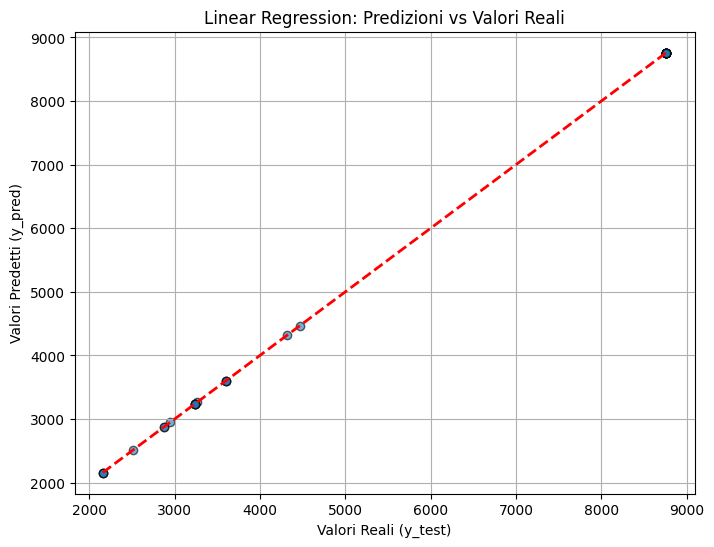

In [ ]:
import matplotlib.pyplot as plt
print("*** Linear Regression ***")

clf = LinearRegression()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print('MAE =', mean_absolute_error(y_test, y_pred))
print('MAPE =',mean_absolute_percentage_error(y_test, y_pred))
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6, edgecolors="k")
plt.xlabel("Valori Reali (y_test)")
plt.ylabel("Valori Predetti (y_pred)")
plt.title("Linear Regression: Predizioni vs Valori Reali")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], "--r", linewidth=2)  # Linea diagonale ideale
plt.grid(True)
plt.show()

Numero ottimale di vicini: 1
MAE: 70.7208
MAPE: 58.1064%


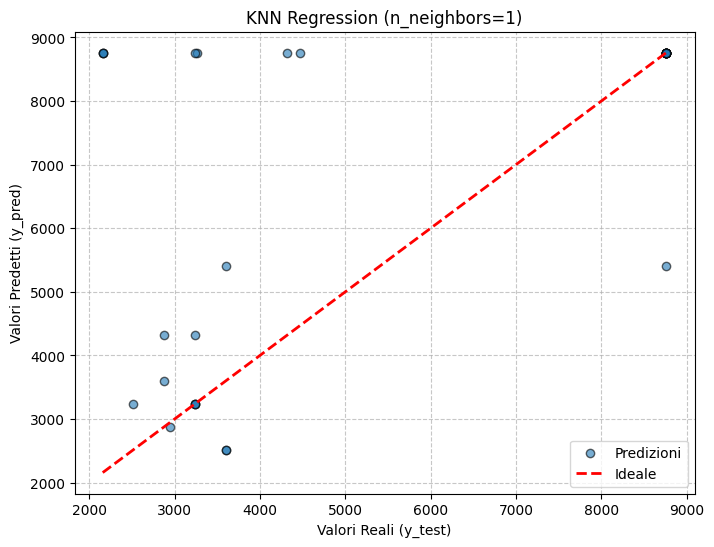

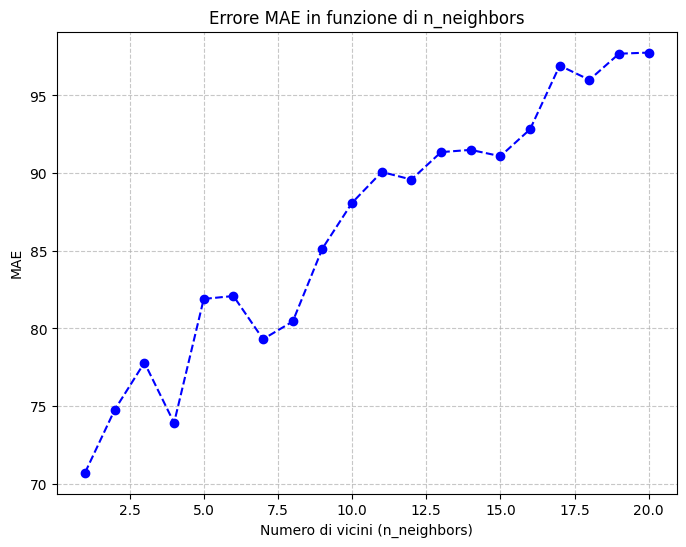

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error

# Definizione del range di n_neighbors da testare
n_neighbors_range = range(1, 21)
errors = []

for n_neighbors in n_neighbors_range:
    knn = KNeighborsRegressor(n_neighbors=n_neighbors)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred) / 24
    errors.append(mae)

# Trova il miglior numero di vicini
best_n = n_neighbors_range[np.argmin(errors)]
print(f"Numero ottimale di vicini: {best_n}")

# Addestramento del modello con il miglior n_neighbors
knn = KNeighborsRegressor(n_neighbors=best_n)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

# Calcolo metriche di errore
mae = mean_absolute_error(y_test, y_pred) / 24
mape = mean_absolute_percentage_error(y_test, y_pred)

# Stampa risultati in formato chiaro
print(f"MAE: {mae:.4f}")
print(f"MAPE: {mape:.4%}")

# Visualizzazione dei risultati
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6, edgecolors="k", label="Predizioni")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], "--r", linewidth=2, label="Ideale")  # Linea diagonale ideale
plt.xlabel("Valori Reali (y_test)")
plt.ylabel("Valori Predetti (y_pred)")
plt.title(f"KNN Regression (n_neighbors={best_n})")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.7)
plt.show()

# Visualizzazione dell'errore in funzione di n_neighbors
plt.figure(figsize=(8, 6))
plt.plot(n_neighbors_range, errors, marker='o', linestyle='dashed', color='b')
plt.xlabel("Numero di vicini (n_neighbors)")
plt.ylabel("MAE")
plt.title("Errore MAE in funzione di n_neighbors")
plt.grid(True, linestyle="--", alpha=0.7)
plt.show()


#Possibili Migliorie e Affinamenti:
1) Avere più informazioni sulle macchine aiuterebbe a individuare le caratteristiche più importanti ed a misurarle ed analizzarle correttamente, come: più info sull'output delle macchine o sul costo della manutenzione.

2) Analisi sulla curva di efficienza - Tempi tra eventi.